# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [3]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

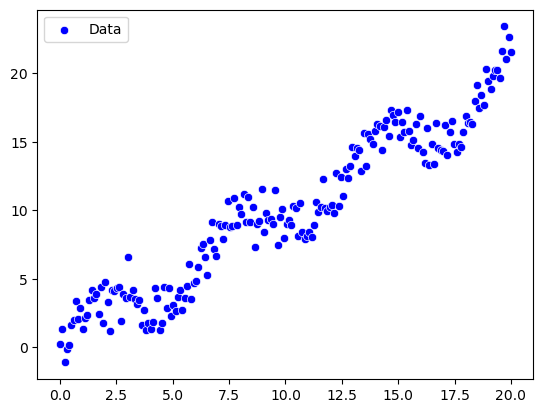

In [4]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [5]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [6]:
df = Simple1DRegressionDataset(X,y)


In [7]:
df[0]


(tensor([0.]), tensor([0.2535]))

In [8]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [9]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.2036]])]

In [10]:
# construct the model using Linear block
in_features = 1
hidden1 = 10
hidden2 = 5
out_features = 1

model_2 = nn.Sequential(
    nn.Linear(in_features, hidden1),
    nn.ReLU(),
    nn.Linear(hidden1, hidden2),
    nn.ReLU(),
    nn.Linear(hidden2, out_features)
)



In [11]:
loss_fn = nn.MSELoss()

In [12]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [13]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [15]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

30.26174545288086
31.612658143043518
59.54390203952789
60.73769271373749
237.22615706920624
239.55702531337738
241.59412467479706
250.96525466442108
263.95998752117157
267.838405251503
271.8286226987839
271.8770039342344
274.2168817780912
283.7287941239774
335.70964815840125
335.8778121583164
345.7525241486728
346.17193142697215
349.06727043911815
350.6264623813331
354.46164647862315
357.463874977082
360.1483141593635
363.3152195625007
364.67813662812114
366.8988924436271
376.3121328763664
376.68992633745074
382.96199483796954
390.1450712196529
394.5097124092281
400.9241525642574
411.4470664970577
412.2726374976337
413.2041388861835
419.50397170707583
440.23227370902896
445.938343655318
447.3314489237964
449.4357131831348
464.3109401576221
479.036004435271
481.12235010787845
532.4729665629566
532.755063187331
532.859470102936
544.1254965998232
544.1878169625998
544.1898129773326
544.9093752694316
544.9374061324634
561.0184341170825
566.7137099006213
576.0095234611072
589.5558710792102


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0557605028152466
1.5427501201629639
6.935541391372681
8.195590376853943
9.681871891021729
14.044298648834229
18.090806484222412
18.55721515417099
19.947182834148407
19.95438143843785
21.113282891456038
27.08865568274632
27.157622928265482
27.87299376213923
34.47015076363459
35.283291096333414
35.445424939040095
38.084500456694514
39.20263853156939
52.75056543434039
53.328916931990534
53.427016543690115
59.83850698405877
62.29303197795525
66.48857955867425
66.49493978312239
67.1125435619615
67.6788705973886
71.8746427684091
72.00779382279143
79.38684121659026
89.55920259049162
89.5800034753047
89.65487014269456
90.67826353525743
93.15293442225084
101.8948701522313
101.89747693110257
147.7020957665518
155.1562326150015
155.15839745709673
157.16063978383318
157.23567263642326
160.4664513305761
162.49090997735038
173.07864229241386
173.6632478670217
195.8258912996389
198.96867541829124
266.4923723177053
286.6944730714895
287.5841426686384
287.58929657237604
322.5706770350225
442.10268234

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.608190536499023
9.303534746170044
12.367292404174805
20.812767028808594
21.057841956615448
22.381743013858795
25.410333693027496
25.417214177548885
25.435317777097225
25.569876678287983
27.03722346574068
32.21913159638643
38.58406890183687
39.14747906476259
51.408897407352924
64.04147530347109
65.29577470570803
73.49064279347658
75.29347456246614
81.64968670159578
92.80751121789217
99.33761013299227
105.37017524987459
107.24279452115297
111.5011372640729
111.75366131216288
111.75813778536394
111.81773451389745
118.40880230488256
119.75371614517644
120.40342632355168
122.82394734444097
131.21496716560796
131.2524044481106
132.17179554374889
132.88832133682445
144.14783709915355
152.42973750503734
153.1079080668278
153.72318094642833
153.7249212389579
153.84599242114928
153.8887336117914
153.9174416785827
154.13365529233124
154.80145857983734
155.81880031281617
162.64794431382325
168.60905490571167
168.6098706702469
173.5034048537491
176.78995108406525
178.17178475658875
178.2792227695

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1647133827209473
1.2713324055075645
6.648444317281246
22.74465861171484
51.46151842921972
56.47199358791113
56.832288943231106
67.50195904821157
71.5792600736022
72.77010007947683
72.79284812323749
75.00621153227985
75.77710605971515
75.84381426684558
76.31868921034038
76.33143532834947
80.0856150444597
94.725490456447
97.81365883909166
107.5767985638231
112.78528702817857
113.4099325593561
115.56072491966188
115.56966600008309
121.33170136995614
126.43823346681893
136.54588708467782
138.73876199312508
140.94733795709908
142.51533112116158
146.32658323831856
149.62798223085701
161.83006391115487
178.31342801637948
180.46680435724556
181.75069412775338
188.19837507791817
216.90543303079903
235.69629416055977
235.79154575057328
239.47569787688553
240.52789938636124
240.97819349355996
241.12384437210858
241.27847379632294
243.02483815141022
243.0739466380328
253.94336955063045
268.1319719981402
269.61268214695156
275.795584006235
286.0222266148776
290.5008447598666
291.0514464210719
291

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0004315147816669196
0.002774898399366066
0.5774797242775094
8.810813311923994
12.006860856403364
24.455803994525922
36.114375237812055
41.5331980031624
41.76499769507791
43.12047657786752
47.82608494578744
47.93597304492141
55.10846125750686
56.39575934081222
60.58606362013961
66.71878313689376
74.62203144698287
87.64149021773483
114.50453114180709
137.47398113875533
138.30908959775115
138.31381214872818
151.74391545073013
161.856584441819
167.02389801756362
181.09787262693862
181.4945036591671
183.54639570132713
186.67005721942405
193.44277040378074
195.30117027179222
201.2054833592556
204.4622427643917
249.7302099885128
258.54325358287315
267.90768496409873
268.35499866024475
293.5690966369293
296.10989267841796
302.49589378849487
302.789413136401
304.87736551181297
320.7324470700405
321.1813749791763
322.73503656403045
327.71464033142547
331.47718973175506
332.24043334738235
333.2761547686241
334.9976533772133
360.2876809956215
384.4977697254799
384.7294748397253
386.0448877187155

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0067833708599209785
0.12370758969336748
0.6342607112601399
1.6995426984503865
13.513090786524117
18.80542152840644
19.9865321489051
23.807166037149727
44.14893620926887
45.53295236546546
50.75062089879066
57.31645065266639
57.316535452438984
58.19943735940615
58.21120547136525
65.95093964418629
83.74383400758961
87.70702909311512
91.29102920374135
92.57329105219105
108.2912123092101
114.76397632440785
119.38762306055287
134.48645995935658
134.89285593113163
135.44369112333516
136.97079323610524
138.07559596380452
138.69018452247838
141.20148961624363
156.26441686233738
161.88466661056736
178.2101194151328
179.90237705787877
185.16016571602086
185.63833691558102
195.55630185088376
206.94216992339352
206.95803641347447
215.73885535268346
220.8697600272135
221.24070720939199
222.6317061689333
223.29056750802556
241.67723475961247
248.39406358270207
250.43771277932683
253.2348116543726
253.8296900895075
258.0885997918085
295.00739633111516
305.867774596496
306.57661472825566
306.59046568

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3819345235824585
4.165751338005066
4.575315147638321
6.194081217050552
7.062990874052048
7.849457234144211
12.450506657361984
12.465999852865934
12.646835844963789
13.65223852917552
13.730365712195635
28.825756032019854
29.703237254172564
34.5201747007668
41.03661795333028
44.65465994551778
48.022994715720415
54.343166548758745
54.97456105425954
56.1980163641274
61.07783480361104
73.0574814863503
77.0419478006661
77.54995419457555
78.72783328965306
81.98352434113622
83.74933506920934
116.05811192467809
116.24570858851075
116.27221159823239
135.19989256747067
138.4282548893243
138.75687052495778
142.4670560527593
155.60907818563282
183.48270107991993
210.69643666036427
210.8130410257727
248.48364191688597
249.20634442009032
262.2484758440405
262.6075697783381
264.04778739251196
266.6388606671244
267.53732409514487
268.65120103396475
282.13253667391837
295.33794000186026
296.7431674245745
298.9142129663378
300.8345432523638
302.9857509378344
306.6120720151812
330.44328691996634
371.659

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16175082325935364
10.109859496355057
10.579347729682922
15.108581185340881
16.37878727912903
16.38609092636034
17.897064260672778
20.478674701880664
29.03303127689287
29.088449414353818
30.368116434197873
37.72361331759021
37.80554753122851
38.04644798813388
51.782201047521085
51.78303571487777
52.77848615194671
53.54214306618087
63.6365749433171
63.72472329880111
65.53500886703841
67.05483408714645
72.79268761421554
82.11133023048751
82.11253190017305
88.19529938674532
89.25008213496767
89.58599325991236
91.70598289347254
101.91678211069666
106.49918004847132
111.61525937891565
125.5546629128512
125.65067583299242
132.53428417420946
139.54832845903002
140.09479391551577
140.92284154868685
143.80552244163118
148.68279218650423
149.52689337707125
151.0300438401755
151.75432896590792
152.3170560596045
176.9649690387305
177.32651382661425
190.18843704438768
190.43674048758112
192.4731267390307
198.63757643080316
198.9669039545115
200.40006580925547
203.66345801926218
209.56962504959665


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.5732593536376953
6.6035308837890625
8.01255202293396
9.03758716583252
9.627505838871002
11.545641005039215
14.39868026971817
20.108844816684723
20.707099080085754
24.344030261039734
24.562850281596184
42.89708070456982
51.319030091166496
51.68609265983105
51.696807058528066
56.01938691921532
57.96677437610924
57.986243579536676
58.735950503498316
58.84008365496993
59.555365201085806
62.353548642247915
62.38272395916283
62.89052543230355
63.03590782172978
66.09521420486271
68.7881196308881
70.42537780292332
74.23489304073155
79.51960011012852
85.62066145427525
86.20126636512578
86.20131840104295
93.70438160294725
98.73145069474413
110.19437183732225
110.21152198048367
110.51282903285755
112.6171016368462
121.70237251849903
128.6194438609673
128.78748401733174
135.53885492416157
149.94767412276997
163.15603384109272
164.01882835956349
168.60883804889454
169.2151462111069
169.36407221587433
175.39764488967194
178.74416722090973
191.99388397963776
193.63929272921814
194.11163039239182
20

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1759873479604721
2.3352202028036118
7.091838702559471
7.199825391173363
18.237841710448265
19.272037014365196
19.34108743816614
19.893756665289402
21.14475993067026
77.44399622827768
103.95899371057749
174.42018298059702
188.6323459520936
228.72865561395884
231.10297111421824
231.17418486624956
231.3124062344432
231.33169329725206
235.38818467222154
235.41875668987632
235.7563019953668
239.0303980074823
239.12610900774598
247.48970210924745
258.2560032643378
263.485098246485
263.83133176341653
263.8370258966461
264.05503496620804
267.094974369742
268.72513815853745
268.974622012116
271.21210527513176
277.69931888673455
300.475829125382
328.3206300744787
328.56463824305683
329.6781471827999
329.90184600744396
329.99125443492085
330.21004946623
339.4084499636665
342.6030927458778
346.84616382513195
358.2334547797218
358.6702071884647
364.9404651382938
364.9617625968531
365.56361751724035
366.15972571540624
368.3720419900492
368.8989875810221
379.44873123336583
383.3513706224039
391.131

In [16]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

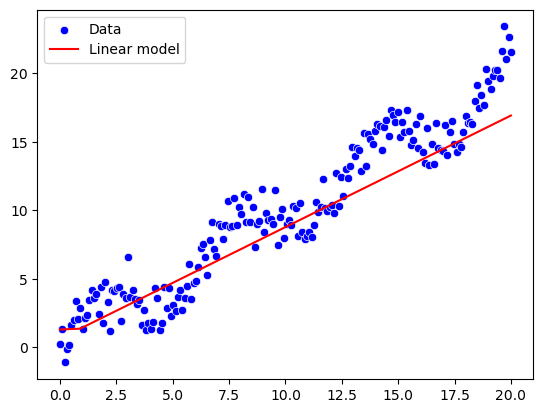

In [17]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
